In [2]:
import pandas as pd
import csv
import numpy as np
from random import shuffle
import funcs as fc
import decimal
from copy import deepcopy
import math
import seaborn as sns

In [3]:
ctx = decimal.Context()
ctx.prec = 20

def float_to_str(f):
    """
    Convert the given float to a string,
    without resorting to scientific notation
    """
    d1 = ctx.create_decimal(repr(f))
    return format(d1, 'f')

def getTwoNumbersGap(num1, num2):
    return abs(num1 - num2) + 1

def getRangeGap(data):
    maxV = max(data)
    minV = min(data)
    return getTwoNumbersGap(maxV, minV)

def getMinMaxFromMultiD(sourceList):
    maxValue = max(sourceList.reshape(-1))
    minValue = min(sourceList.reshape(-1))
    
    return maxValue, minValue

def getCategoryDiversityCNT(sourceList):
    return len(set([j for sub in sourceList for j in sub]))

In [4]:
def getOrgAllColumnDivertyCNT(datapath):
    org_moned_dataset = fc.readCSV(datapath, sep='\t')
    print(org_moned_dataset[0])
    org_moned_dataset = org_moned_dataset[1:]
    
    for dataRow in org_moned_dataset:
        dataRow[0] = int(dataRow[0])
        # 원본데이터 각 컬럼별 데이터 diversity count 추출
    
    columnsDiversityCNT = dict()
    
    for i, colName in enumerate(evalColNames):
        if colName in categoricalColNames:
            colIDX = evalColNames.index(colName)
            columnsDiversityCNT[colIDX] = len(set([data[i] for data in org_moned_dataset]))
        else:
            diversityCNT = getRangeGap([float(data[i]) for data in org_moned_dataset])
            columnsDiversityCNT[i] =diversityCNT       
        
        
    return columnsDiversityCNT
    

def getCatetoryColDiversityCNT(cellData):
    cnt = len(cellData.split(','))
    return cnt

def getNumericColDiversityCNT(cellData):
    numericData = [float(data.strip()) for data in cellData.split('-') if data.strip()]
    return getRangeGap(numericData)  

In [5]:
def getLEScore(normalizedDataSet): 
        
    eachColumnLEScoreList = list()    
    normalizedDataSet_cols =normalizedDataSet[0]
    print(normalizedDataSet_cols)
    totalColNum = len(normalizedDataSet_cols)-1
    
    for i, colName in enumerate(normalizedDataSet_cols):
        if colName not in evalColNames: continue
            
        colDataSet = [data[i] for data in normalizedDataSet[1:]]  # if len(data) > 1
        isCategoriCol = colName in categoricalColNames
        colDiversityCNT  = evalColDirvertyDIC[evalColNames.index(colName)]   
        
        colLEScoreList = list()  
        for i, cellData in enumerate(colDataSet):
            if isCategoriCol:
                cellDiversityCNT = getCatetoryColDiversityCNT(cellData)
                
            else:
#                 try:
                cellDiversityCNT = getNumericColDiversityCNT(cellData)
#                 except:
#                     print(i, cellData)
#                     print(colName)
#                     break
                
            
            
            colLEScoreList.append(abs(cellDiversityCNT-1)/abs(colDiversityCNT-1))
            
        colLEScore = sum(colLEScoreList) / len(colDataSet)
        print(colName ,"sum :", sum(colLEScoreList))
        print(colName ,"len :", len(colDataSet))
        print(colName ,"colLEScore :", colLEScore)
        print('')
        eachColumnLEScoreList.append(colLEScore)
    
    print('totalColNum :', totalColNum)
    leScore = sum(eachColumnLEScoreList)/totalColNum 
    leScore = round(leScore, 7)
    print("totla LE SCORE :", leScore)
    finalResult =[]  
    finalResult.append(['AGE', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CONDITION', 'Total LE SCORE'])
    clonedColLe = deepcopy(eachColumnLEScoreList)
    clonedColLe.append(leScore)
    finalResult.append(clonedColLe)
    
    return finalResult

#### CONST VARs

In [6]:
evalColNames = ['AGE', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CONDITION']
categoricalColNames = ['RACE',  'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CONDITION']
originalDataSet_Path = './data/finalPatientDataSet_20.csv'

recover_bert_cityblock_path = 'recover_bert_cityblock.csv'

In [7]:
origin_dataset = fc.readCSV(originalDataSet_Path, sep='\t')

> Get Data Detalis Min MAX

In [9]:
finalPatientDataSet_20_dataset = fc.readCSV('./data/finalPatientDataSet_20.csv', sep='\t')


In [10]:
finalPatientDataSet_20_dataset[0:10]

for i, colName2  in enumerate(finalPatientDataSet_20_dataset[0]):
    print(colName2, len(set([data[i] for data in finalPatientDataSet_20_dataset[1:]])))
    


AGE 111
RACE 6
ETHNICITY 24
GENDER 2
BIRTHPLACE 27
CONDITIOIN 133
DEATH 2


In [11]:
convertFileList = ['convert_cityblock_finalPatientDataSet_20.csv','convert_cosine_finalPatientDataSet_20.csv','convert_euclidean_finalPatientDataSet_20.csv']


In [12]:
minmaxCols = ['AGE', 'BIRTHPLACE', 'ETHNICITY', 'GENDER', 'RACE', 'CONDITION']

In [13]:
for filePath in convertFileList:
    convert_pd =  pd.read_csv('./data/'+ filePath, sep='\t')
    minList = convert_pd.describe().loc['min'].tolist()
    maxList = convert_pd.describe().loc['max'].tolist()
    meanList = convert_pd.describe().loc['mean'].tolist()
    print(filePath)
#     print(convert_pd.describe())
    for idx in range(len(meanList)):
    
        colName = convert_pd.columns[idx]
        minVal = round(minList[idx], 2)
        maxVal = round(maxList[idx], 2)
        
#         print(colName)
        print(str(minVal) +' ~ '+ str(maxVal))

#     for colName1 in minmaxCols:
#         print(round(min(convert_pd[colName1].values), 2))
        
    print("")
    
    

convert_cityblock_finalPatientDataSet_20.csv
0.0 ~ 110.0
-256.74 ~ 1.0
-269.12 ~ 1.0
-79.21 ~ 1.0
-269.54 ~ 1.0
-301.37 ~ 1.0
0.0 ~ 1.0

convert_cosine_finalPatientDataSet_20.csv
0.0 ~ 110.0
0.82 ~ 1.0
0.85 ~ 1.0
0.98 ~ 1.0
0.8 ~ 1.0
0.77 ~ 1.0
0.0 ~ 1.0

convert_euclidean_finalPatientDataSet_20.csv
0.0 ~ 110.0
-10.84 ~ 1.0
-11.89 ~ 1.0
-2.6 ~ 1.0
-11.56 ~ 1.0
-13.79 ~ 1.0
0.0 ~ 1.0



#### Origin Code Test

In [14]:
org_moned_dataset = fc.readCSV('./normalized/recover_origin_wc.csv', sep='\t')

In [15]:
evalColDirvertyDIC = getOrgAllColumnDivertyCNT(originalDataSet_Path)
evalColDirvertyDIC

['AGE', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CONDITIOIN', 'DEATH']


{0: 111.0, 1: 6, 2: 24, 3: 2, 4: 27, 5: 133}

#### Measure LM Score

In [16]:
def exeLeScore(path,basePath=''):
    print(path, "LE Score")
    bert_wc_cosine_dataset = fc.readCSV('./normalized/'+basePath+'/'+path+'.csv', sep='\t')
#     bert_wc_cosine_dataset = fc.readCSV('./ss/'+path+'.csv', sep='\t')
    
    print(len(bert_wc_cosine_dataset)-1)
    result = getLEScore(bert_wc_cosine_dataset)
    print("=========================================================")
    return result

In [17]:
kleDict = {'k2':None, 'k3':None, 'k4':None, 'k10':None}

In [18]:
#### k_A_dataset_org_0613 오리지널 데이터 
k_var = 'k10'
leDict = dict()
result0 = exeLeScore('recover_origin_wc',k_var)
leDict['Original']= result0

recover_origin_wc LE Score
224885
['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']
AGE sum : 4872.9818181955825
AGE len : 224885
AGE colLEScore : 0.021668772119952787

BIRTHPLACE sum : 1128.7692307691157
BIRTHPLACE len : 224885
BIRTHPLACE colLEScore : 0.005019317565729665

CONDITION sum : 4251.022727287877
CONDITION len : 224885
CONDITION colLEScore : 0.018903095925863787

ETHNICITY sum : 1162.8695652177075
ETHNICITY len : 224885
ETHNICITY colLEScore : 0.005170952109823721

GENDER sum : 0.0
GENDER len : 224885
GENDER colLEScore : 0.0

RACE sum : 115.8000000000011
RACE len : 224885
RACE colLEScore : 0.0005149298530360011

totalColNum : 6
totla LE SCORE : 0.0085462


In [19]:
#### recover_bert_wc_cosine 코사인
result1 = exeLeScore('recover_bert_wc_cosine', k_var)
leDict['Cosine']= result1

recover_bert_wc_cosine LE Score
224885
['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']
AGE sum : 5200.054545460209
AGE len : 224885
AGE colLEScore : 0.023123172045535312

BIRTHPLACE sum : 2435.1538461528357
BIRTHPLACE len : 224885
BIRTHPLACE colLEScore : 0.010828440519166845

CONDITION sum : 5376.931818193828
CONDITION len : 224885
CONDITION colLEScore : 0.02390969525843799

ETHNICITY sum : 8017.304347840101
ETHNICITY len : 224885
ETHNICITY colLEScore : 0.03565068522951776

GENDER sum : 8638.0
GENDER len : 224885
GENDER colLEScore : 0.03841074326878182

RACE sum : 6473.799999996312
RACE len : 224885
RACE colLEScore : 0.028787157880678177

totalColNum : 6
totla LE SCORE : 0.026785


In [20]:
#### recover_bert_wc_cosine 유클리디언
result2 = exeLeScore('recover_bert_wc_euclidean', k_var)
leDict['Euclidean']= result2

recover_bert_wc_euclidean LE Score
224885
['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']
AGE sum : 4992.763636369303
AGE len : 224885
AGE colLEScore : 0.022201407992393014

BIRTHPLACE sum : 2729.6538461523915
BIRTHPLACE len : 224885
BIRTHPLACE colLEScore : 0.012137998737809954

CONDITION sum : 4302.636363647571
CONDITION len : 224885
CONDITION colLEScore : 0.01913260717098771

ETHNICITY sum : 8084.391304361095
ETHNICITY len : 224885
ETHNICITY colLEScore : 0.03594900195371454

GENDER sum : 10097.0
GENDER len : 224885
GENDER colLEScore : 0.044898503679658495

RACE sum : 5336.399999997799
RACE len : 224885
RACE colLEScore : 0.02372946172487182

totalColNum : 6
totla LE SCORE : 0.0263415


In [21]:
#### recover_bert_wc_cosine 맨하탄
result3 = exeLeScore('recover_bert_wc_cityblock', k_var)
leDict['Cityblock']= result3

recover_bert_wc_cityblock LE Score
224885
['AGE', 'BIRTHPLACE', 'CONDITION', 'DEATH', 'ETHNICITY', 'GENDER', 'RACE']
AGE sum : 4774.009090913986
AGE len : 224885
AGE colLEScore : 0.021228668390128227

BIRTHPLACE sum : 2491.8846153832774
BIRTHPLACE len : 224885
BIRTHPLACE colLEScore : 0.011080706207098194

CONDITION sum : 4084.7651515241614
CONDITION len : 224885
CONDITION colLEScore : 0.01816379550225298

ETHNICITY sum : 11245.000000017446
ETHNICITY len : 224885
ETHNICITY colLEScore : 0.05000333503798584

GENDER sum : 8211.0
GENDER len : 224885
GENDER colLEScore : 0.036511995019676724

RACE sum : 5614.999999997571
RACE len : 224885
RACE colLEScore : 0.02496831713986069

totalColNum : 6
totla LE SCORE : 0.0269928


In [22]:
kleDict[k_var] = leDict

In [23]:
### 막대그래프용 데이터 만들기

leDict = kleDict['k4']
leColumns = ['AGE', 'BIRTHPLACE', 'CONDITION', 'ETHNICITY', 'GENDER', 'RACE', 'TOTAL LE']

leBarChartDataList = []
leTableDataList = [['AGE'], ['BIRTHPLACE'], ['CONDITION'], ['ETHNICITY'], ['GENDER'], ['RACE'], ['TOTAL LM']]
# leList.append()

for key, item in leDict.items():
    
    
    columns = item[0]
    
    valueRow = None
    conRow = valueRow
    for i, value in enumerate(item[1]):
        
        colName = leColumns[i]
        roundedVal = float(float_to_str(round(value, 5)))
        
        valueRow = [colName, roundedVal, key]   
        if colName != 'CONDITION':
            leBarChartDataList.append(valueRow) 
        else:
            conRow = valueRow
            
        leTableDataList[i].append(float_to_str(round(value, 5)))
            
    leBarChartDataList.insert(len(leBarChartDataList)-1,conRow) 
    
            
conSeries = leTableDataList.pop(2)
leTableDataList.insert(5, conSeries)
leTableDataList


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
talbe_pd = pd.DataFrame(leTableDataList, columns=['Columns', 'Origianl', 'Cosine', 'Euclidean', 'Manhattan'])
talbe_pd

talbe_pd.to_csv('./output/LEScore_Table_'+k_var+'.csv', encoding='utf-8', index=False)
talbe_pd


#### 컬럼별 LM Score 비교 막대그래프

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))


dataSource_pd = pd.DataFrame(leBarChartDataList, columns=['Columns', 'LM Score', 'Data Type'])
sns.barplot(data=dataSource_pd, x='Columns', y='LM Score', hue='Data Type')



#### 데이터 타입별 LM Score 비교 막대그래프

In [ ]:
totalLMList = []

for kCount in kleDict.keys():
    
    tLMDict= kleDict[kCount]
    for key, values in tLMDict.items():
        LmValues = values[1]
        LmValue = LmValues[-1]
        totalLMList.append([kCount, LmValue, key])




import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))


dataSource_pd = pd.DataFrame(totalLMList, columns=['K', 'Equivalent Class Count', 'Datatype'])
sns.barplot(data=dataSource_pd, x='K', y='Equivalent Class Count', hue='Datatype')

In [ ]:
dataSource_pd

동질클래스 종류 및 타입 비교

In [ ]:
norPaths = ['original_moned_DataSet', 'recover_bert_cosine','recover_bert_euclidean', 'recover_bert_cityblock']

for norpath in norPaths:
    sameClassCNTDICT = dict()
    normaled_dataset = fc.readCSV('./normalized/'+norpath+'.csv', sep='\t')
    for datarow in normaled_dataset[1:]:
        cnt = int(datarow[len(datarow)-1])
        key = ' '.join(datarow[:-1])
        if key not in sameClassCNTDICT:
            sameClassCNTDICT[key] = []
        
        sameClassCNTDICT[key].append(datarow)           
    
    print(norpath, len(sameClassCNTDICT.keys()))
    






In [24]:
k_var='k10'


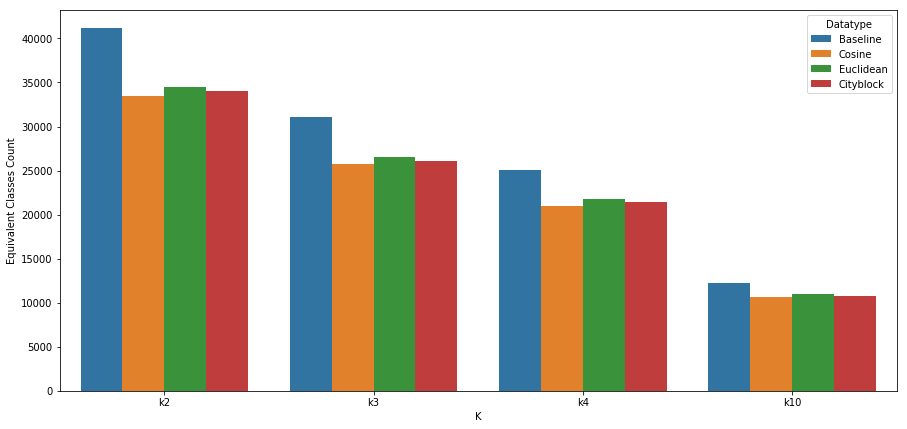

In [25]:
norPaths = ['recover_origin', 'recover_bert_cosine','recover_bert_euclidean', 'recover_bert_cityblock']
dataTeyeList = ['Baseline', 'Cosine','Euclidean', 'Cityblock']
kList = ['k2', 'k3', 'k4', 'k10']
sameClassBarList = []
for kcount in kList:
    
    for i, norpath in enumerate(norPaths):
        sameClassCNTDICT = dict()
        normaled_dataset = fc.readCSV('./normalized/'+kcount+'/'+norpath+'.csv', sep='\t')
        dataName = dataTeyeList[i]

        for datarow in normaled_dataset[1:]:
            cnt = int(datarow[len(datarow)-1])
            key = ' '.join(datarow[:3]+datarow[5:-1])
            if key not in sameClassCNTDICT:
                sameClassCNTDICT[key] = []

            sameClassCNTDICT[key].append(datarow)           

        sameClassBarList.append([kcount, len(sameClassCNTDICT.keys()), dataName])
    #     print(norpath, len(sameClassCNTDICT.keys()))
    
    
    


import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))


dataSource_pd = pd.DataFrame(sameClassBarList, columns=['K', 'Equivalent Classes Count', 'Datatype'])
sns.barplot(data=dataSource_pd, x='K', y='Equivalent Classes Count', hue='Datatype')




In [ ]:
sameClassBarList



41136, 'Origin’], 
33492, 'Cosine’], 
34493, 'Euclidean’], 
34039, 'Cityblock'], 

31130, 'Origin'], 
25797, 'Cosine'], 
26551, 'Euclidean'], 
26095, 'Cityblock'], 

25081, 'Origin'], 
20993, 'Cosine'], 
21764, 'Euclidean'], 
21413, 'Cityblock'], 

12243, 'Origin'], 
10614, 'Cosine'], 
11043, 'Euclidean'], 
10807, 'Cityblock']


k=2
recover_bert_cosine 33492
recover_bert_euclidean 34493
recover_bert_cityblock 34039

k=3
recover_origin 31130
recover_bert_cosine 25797
recover_bert_euclidean 26551
recover_bert_cityblock 26095

k=4
recover_origin 25081
recover_bert_cosine 20993
recover_bert_euclidean 21764
recover_bert_cityblock 21413

k=10
recover_origin 12243
recover_bert_cosine 10614
recover_bert_euclidean 11043
recover_bert_cityblock 10807


In [251]:
normaled_dataset = fc.readCSV('./normalized/recover_bert_euclidean.csv', sep='\t')


In [260]:
normaled_dataset[1][:-1]


['16-32',
 'FR',
 'Normal pregnancy,Antepartum eclampsia',
 '0',
 'french',
 'FEMALE',
 'white']

In [259]:
normaled_dataset[1][:3]+normaled_dataset[1][5:-1]

['16-32', 'FR', 'Normal pregnancy,Antepartum eclampsia', 'FEMALE', 'white']

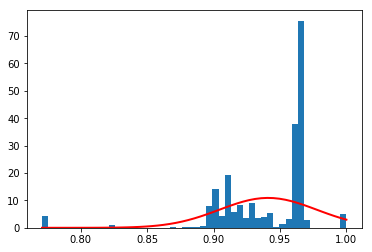

In [242]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats

def normalFunS(x, mu,sd):
    a=1/(sd*np.sqrt(2*np.pi))
    b=np.exp(-(x-mu)**2/(2*sd**2))
    return(a*b)

normaled_dataset = fc.readCSV('./data/convert_cosine_finalPatientDataSet_20.csv', sep='\t')
cosineValues = [float(data[5]) for data in normaled_dataset[1:]]


x=cosineValues
n, bins, ig=plt.hist(x, bins=50, normed=True)
mu=np.mean(x)
sd=np.std(x)
plt.plot(bins, normalFunS(bins, mu, sd), linewidth=2, color="r")
plt.show()


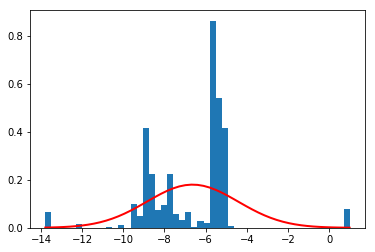

In [243]:
normaled_dataset = fc.readCSV('./data/convert_euclidean_finalPatientDataSet_20.csv', sep='\t')
cosineValues = [float(data[5]) for data in normaled_dataset[1:]]

x=cosineValues
n, bins, ig=plt.hist(x, bins=50, normed=True)
mu=np.mean(x)
sd=np.std(x)
plt.plot(bins, normalFunS(bins, mu, sd), linewidth=2, color="r")
plt.show()


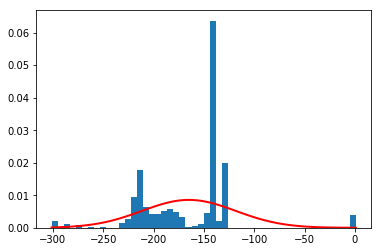

In [244]:
normaled_dataset = fc.readCSV('./data/convert_cityblock_finalPatientDataSet_20.csv', sep='\t')
cosineValues = [float(data[5]) for data in normaled_dataset[1:]]

x=cosineValues
n, bins, ig=plt.hist(x, bins=50, normed=True)
mu=np.mean(x)
sd=np.std(x)
plt.plot(bins, normalFunS(bins, mu, sd), linewidth=2, color="r")
plt.show()

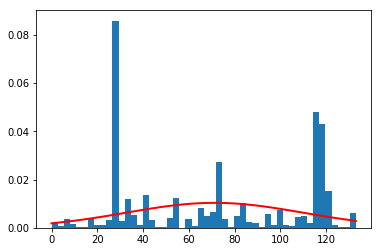

In [249]:
nor_dataset = fc.readCSV('./data/finalPatientDataSet_20.csv', sep='\t')
colValues = [data[5] for data in nor_dataset]

conIndexMasterDict = dict()
for i, conNm in enumerate(set(colValues)):
    conIndexMasterDict[conNm] = i

colValuesIndexList = []

for conNm in colValues:
    colValuesIndexList.append(conIndexMasterDict[conNm])



x=colValuesIndexList
n, bins, ig=plt.hist(x, bins=50, normed=True)
mu=np.mean(x)
sd=np.std(x)
plt.plot(bins, normalFunS(bins, mu, sd), linewidth=2, color="r")
plt.show()

In [248]:
len(resultList)

134